In [1]:
#Headers and libraries that we're gonna use

%matplotlib inline
#print(__doc__)

import numpy as np # We need NumPy in order to work with arrays which we'll use to order our data
import matplotlib.pyplot as plt # Matplotlib will be used for all the plots that we will make
from sklearn.utils.validation import check_random_state #to put a global seed for random number generator
from tutorial import plot_clf

#Regressor algorithms
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

#Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split

In [2]:
import csv
photo_names = []
photos = []
tags = []

with open('training_solutions_rev1.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    i = 0
    restrictor = 10000
    for row in reader:
        if (restrictor > 0):
            if i >1:
                a = float(row[1])
                b = float(row[2])
                c = float(row[3])
                suma = a+b+c
                
                a = float(a)/float(suma)
                b = float(b)/float(suma)
                c = float(c)/float(suma)
                
                maxim = np.max([a, b, c])
                
                if (maxim >= 0.5):
                    if (maxim == a):
                        photo_names.append(row[0])
                        tag = "smooth"
                        tags.append([tag, row[0]])
                    elif (maxim == b):
                        photo_names.append(row[0])
                        tag = "features"
                        tags.append([tag, row[0]])
                    else:
                        tag = "point"
                
            i += 1
            restrictor -= 1
        

print(len(photo_names))
       
import scipy.misc as scp_misc
restrictor = 10000
for photo in photo_names:
    if (restrictor > 0):
        img = scp_misc.imread("images_training_rev1/"+photo+".jpg", mode="L")
        img = scp_misc.imresize(img, 25)
        photos.append(img)
        restrictor -= 1

9741


In [3]:
a = 0
while (a < len(photos)):
    photos[a] = np.reshape(photos[a], -1)
    a += 1

Now let's divide the samples into training and test samples. *Comment*: maybe we should massage the y sample.  

In [5]:
X = photos
y = tags
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = KNeighborsClassifier()

y_test_id = []
y_test_v = []
y_train_id = []
y_train_v = []
 
for value in range(len(y_test)):
    y_test_id.append(y_test[value][1])
    y_test_v.append(y_test[value][0])
for value in range(len(y_train)):
    y_train_id.append(y_train[value][1])
    y_train_v.append(y_train[value][0])

y_test_predict = dict()
clf.fit(X_train, y_train_v)
y_test_predict = clf.predict(X_test)

In [6]:
y2 = []
print len(y)
for value in range(len(y)):
    y2.append(y[value][0])

9741


In [7]:
for hoho in range(len(y_test_id)):
    print([y_test_predict[hoho], y_test_id[hoho]], y_test_v[hoho])

(['smooth', '179445'], 'features')
(['features', '177315'], 'features')
(['features', '243825'], 'features')
(['smooth', '107688'], 'smooth')
(['smooth', '157621'], 'smooth')
(['smooth', '146357'], 'features')
(['features', '181755'], 'smooth')
(['features', '234108'], 'features')
(['features', '212984'], 'features')
(['features', '134170'], 'smooth')
(['smooth', '185588'], 'features')
(['smooth', '237243'], 'features')
(['features', '209686'], 'features')
(['smooth', '119314'], 'smooth')
(['features', '191538'], 'features')
(['smooth', '205781'], 'smooth')
(['smooth', '111481'], 'smooth')
(['smooth', '140063'], 'smooth')
(['smooth', '194421'], 'smooth')
(['features', '137901'], 'features')
(['smooth', '112512'], 'smooth')
(['features', '234677'], 'features')
(['features', '178451'], 'features')
(['smooth', '142834'], 'features')
(['smooth', '142202'], 'smooth')
(['smooth', '125667'], 'smooth')
(['features', '145832'], 'features')
(['smooth', '234973'], 'features')
(['smooth', '154669'

In [8]:
LEN = len(y_test_id)
SCORE = 0.0
for elem in range(LEN):
    if y_test_predict[elem] == y_test_v[elem]:
        SCORE = SCORE + 1
SCORE = float(SCORE)
print (SCORE/LEN)

0.681034482759


[ 0.4  0.4  0.2  0.8  0.8  0.   1.   0.6  0.6  0. ]
['features' 'features' 'features' 'smooth' 'smooth' 'features' 'smooth'
 'features' 'smooth' 'features']
[ 0.4  0.4  0.2 ...,  0.2  0.   0.2]


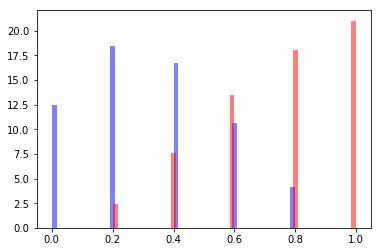

In [9]:
fig = plt.figure()
d = clf.predict_proba(X_train)[:, 1]

y_train_v = np.array(y_train_v)

print(d[0:10])
print(y_train_v[0:10])
print(d[y_train_v == "features"])

plt.hist(d[y_train_v == "features"], bins=50, normed=True, color="b", alpha=0.5)
plt.hist(d[y_train_v == "smooth"], bins=50, normed=True, color="r", alpha=0.5)
#plt.hist(d[y_train_v == "point"], bins=50, normed=True, color="y", alpha=0.5)

plt.show()

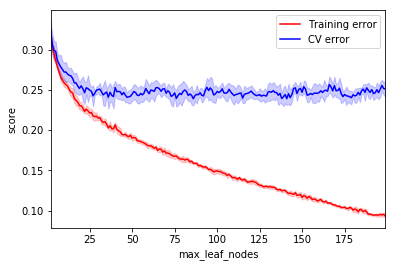

In [13]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = range(2, 200)
param_name = "max_leaf_nodes"

train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y2, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best")